In [49]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.visualization import hist

In [50]:
results_path = Path("../data/results")

In [61]:
dfs = []

for result_path in results_path.iterdir():
    if str(result_path).endswith(".parquet"):
        dfs.append(pd.read_parquet(result_path))

df = pd.concat(dfs)

In [62]:
df.experiment_name.unique()

array(['XRAY-64x64-SYNTHETIC-UNBALANCED', 'XRAY-64x64-REAL',
       'XRAY-64x64-SYNTHETIC-BALANCED'], dtype=object)

In [63]:
# df = df[df.f1_macro_test > 0.5]

In [64]:
def get_max_f1_and_argmax(df):
    idxmax = df["f1_macro_test"].argmax()
    max = df["f1_macro_test"].values[idxmax]
    return idxmax, max

In [65]:
better_results = (
    df.groupby(["experiment_name", "run"])
    .apply(get_max_f1_and_argmax)
)

In [66]:
rdf = pd.DataFrame(better_results)
rdf[["converge_at", "f1"]] = rdf.loc[:, 0].tolist()
rdf = rdf.drop(columns=[0])
rdf = rdf.reset_index()

In [67]:
from astropy.stats import sigma_clip

In [68]:
display(rdf)

,experiment_name,run,converge_at,f1
0,XRAY-64x64-REAL,1717245381,646.0,0.774314
1,XRAY-64x64-REAL,1717245759,921.0,0.802422
2,XRAY-64x64-REAL,1717246216,710.0,0.776512
3,XRAY-64x64-REAL,1717246653,955.0,0.789884
4,XRAY-64x64-REAL,1717247140,1108.0,0.808179
...,...,...,...,...
85,XRAY-64x64-SYNTHETIC-UNBALANCED,1717227620,656.0,0.808950
86,XRAY-64x64-SYNTHETIC-UNBALANCED,1717227899,804.0,0.808353
87,XRAY-64x64-SYNTHETIC-UNBALANCED,1717228206,665.0,0.809415
88,XRAY-64x64-SYNTHETIC-UNBALANCED,1717228544,673.0,0.802652


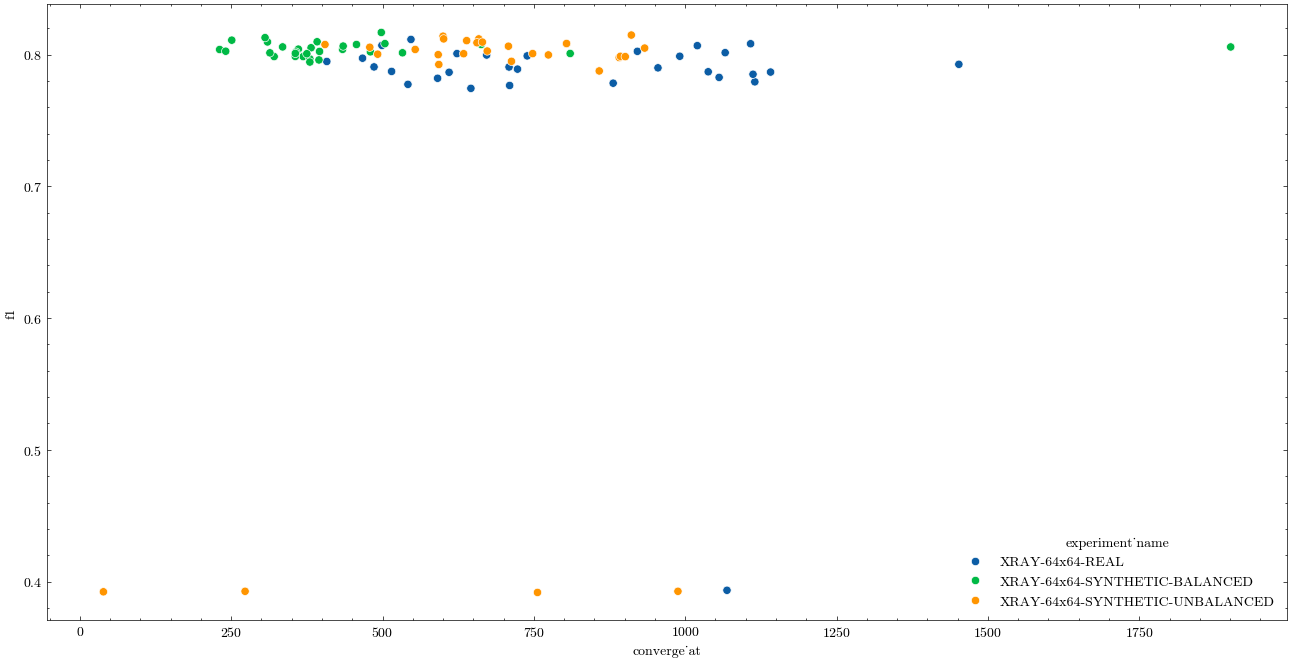

In [69]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.scatterplot(data=rdf, x="converge_at", y="f1", hue="experiment_name")
# plt.scatter(x=rdf["converge_at"], y=rdf["f1"])
plt.show()

In [73]:
rdf.groupby("experiment_name").describe()

converge_at                                 \
                                      count        mean         std    min   
experiment_name                                                              
XRAY-64x64-REAL                        30.0  813.733333  266.869067  408.0   
XRAY-64x64-SYNTHETIC-BALANCED          30.0  450.766667  298.501393  231.0   
XRAY-64x64-SYNTHETIC-UNBALANCED        30.0  674.533333  204.301288   39.0   

                                                                  f1  \
                                    25%    50%     75%     max count   
experiment_name                                                        
XRAY-64x64-REAL                  595.75  731.0  1051.5  1452.0  30.0   
XRAY-64x64-SYNTHETIC-BALANCED    340.25  380.0   451.5  1901.0  30.0   
XRAY-64x64-SYNTHETIC-UNBALANCED  594.75  669.0   804.0   988.0  30.0   

                                                                         \
                                     mean       std       min       25%   
experiment_name                                                           
XRAY-64x64-REAL                  0.778514  0.073449  0.393399  0.783228   
XRAY-64x64-SYNTHETIC-BALANCED    0.803791  0.005162  0.794289  0.800787   
XRAY-64x64-SYNTHETIC-UNBALANCED  0.748950  0.142415  0.391763  0.797876   

                                                               
                                      50%       75%       max  
experiment_name                                                
XRAY-64x64-REAL                  0.790202  0.799456  0.811449  
XRAY-64x64-SYNTHETIC-BALANCED    0.803142  0.807302  0.816750  
XRAY-64x64-SYNTHETIC-UNBALANCED  0.801677  0.808292  0.814776

In [74]:
import scienceplots

plt.style.use(['science', 'no-latex'])

---
# Resultados F1

/tmp/ipykernel_1246987/2186602830.py:34: UserWarning: Glyph 231 (\N{LATIN SMALL LETTER C WITH CEDILLA}) missing from current font.
  plt.savefig("f1.png")
/tmp/ipykernel_1246987/2186602830.py:34: UserWarning: Glyph 245 (\N{LATIN SMALL LETTER O WITH TILDE}) missing from current font.
  plt.savefig("f1.png")
/tmp/ipykernel_1246987/2186602830.py:34: UserWarning: Glyph 227 (\N{LATIN SMALL LETTER A WITH TILDE}) missing from current font.
  plt.savefig("f1.png")
/tmp/ipykernel_1246987/2186602830.py:34: UserWarning: Glyph 233 (\N{LATIN SMALL LETTER E WITH ACUTE}) missing from current font.
  plt.savefig("f1.png")
/tmp/ipykernel_1246987/2186602830.py:34: UserWarning: Glyph 201 (\N{LATIN CAPITAL LETTER E WITH ACUTE}) missing from current font.
  plt.savefig("f1.png")
/home/ale/Documents/diffusion-augmentation/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 231 (\N{LATIN SMALL LETTER C WITH CEDILLA}) missing from current font.
  fig.canvas.print_figure(bytes_i

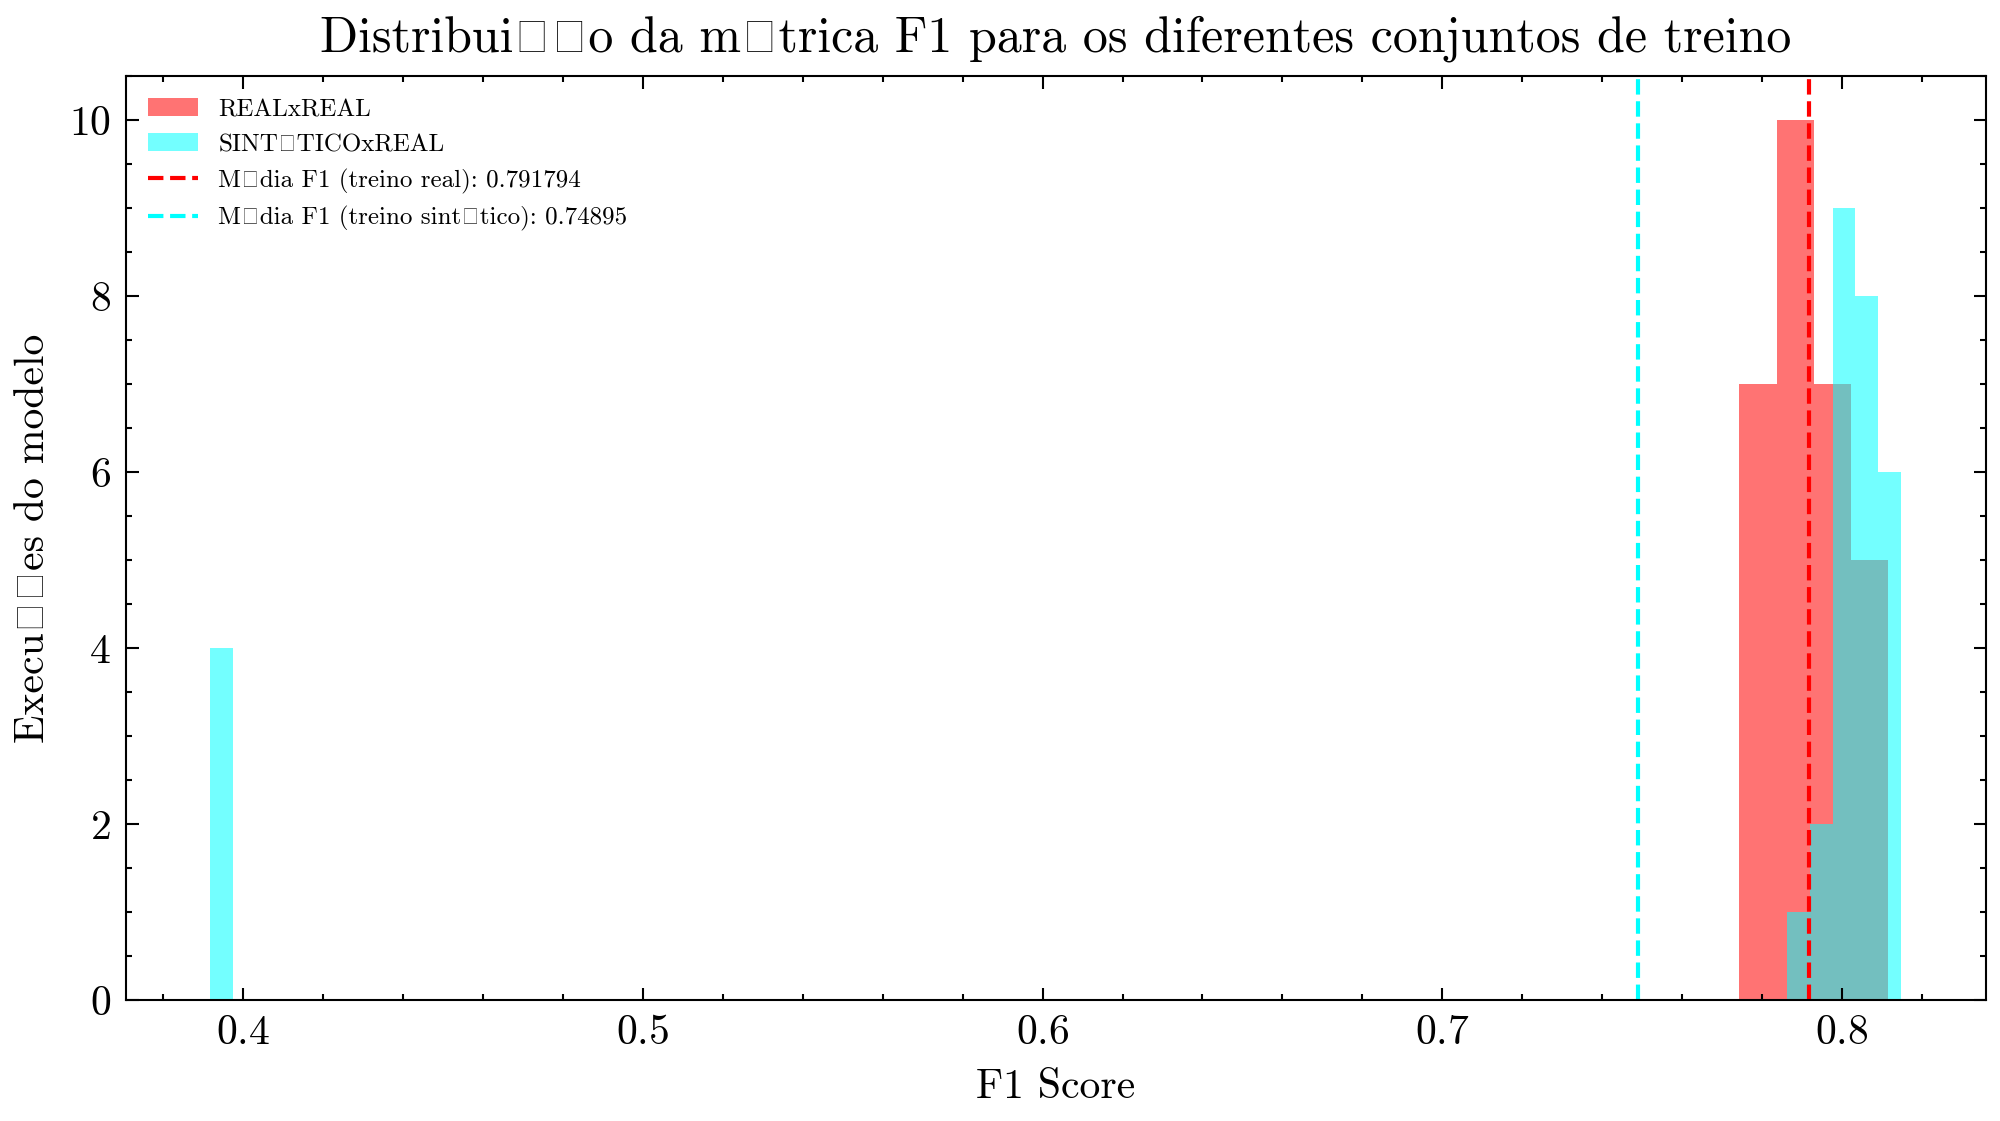

In [75]:
fig, ax = plt.subplots(figsize=(8, 4), dpi=(300))

runs_reais = sigma_clip(rdf[rdf.experiment_name == "XRAY-64x64-REAL"].f1, sigma=3, cenfunc="mean", masked=False)
runs_sinteticas = sigma_clip(rdf[rdf.experiment_name == "XRAY-64x64-SYNTHETIC-UNBALANCED"].f1, sigma=3, cenfunc="mean", masked=False)

hist(
    runs_reais,
    histtype='stepfilled',
    bins="knuth",
    alpha=.55,
    ax=ax,
    color='red',
    label="REALxREAL"
)
hist(
    runs_sinteticas,
    histtype='stepfilled',
    bins="knuth",
    alpha=.55,
    ax=ax,
    color='cyan',
    label="SINTÉTICOxREAL",
)

ax.set_xlabel("F1 Score")
ax.set_ylabel("Execuções do modelo")

ax.axvline(runs_reais.mean(), color='red', linestyle='--', label=f"Média F1 (treino real): {round(runs_reais.mean(), 6)}")
ax.axvline(runs_sinteticas.mean(), color='cyan', linestyle='--', label=f"Média F1 (treino sintético): {round(runs_sinteticas.mean(), 6)}")

ax.set_title("Distribuição da métrica F1 para os diferentes conjuntos de treino")

plt.legend(prop={"size": 6})
plt.savefig("f1.png")

In [76]:
from statsmodels.stats.weightstats import ttest_ind

In [77]:
tstat, p, dof = ttest_ind(runs_reais, runs_sinteticas, value=0)

print(f"p-value: {p}")

p-value: 0.11172986299379985


---

# Tempo de convergência

Plotar gráfico de convergência selecionando aleatoriamente 10 runs de cada conjunto de treino diferente

/home/ale/Documents/diffusion-augmentation/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 233 (\N{LATIN SMALL LETTER E WITH ACUTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ale/Documents/diffusion-augmentation/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 201 (\N{LATIN CAPITAL LETTER E WITH ACUTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


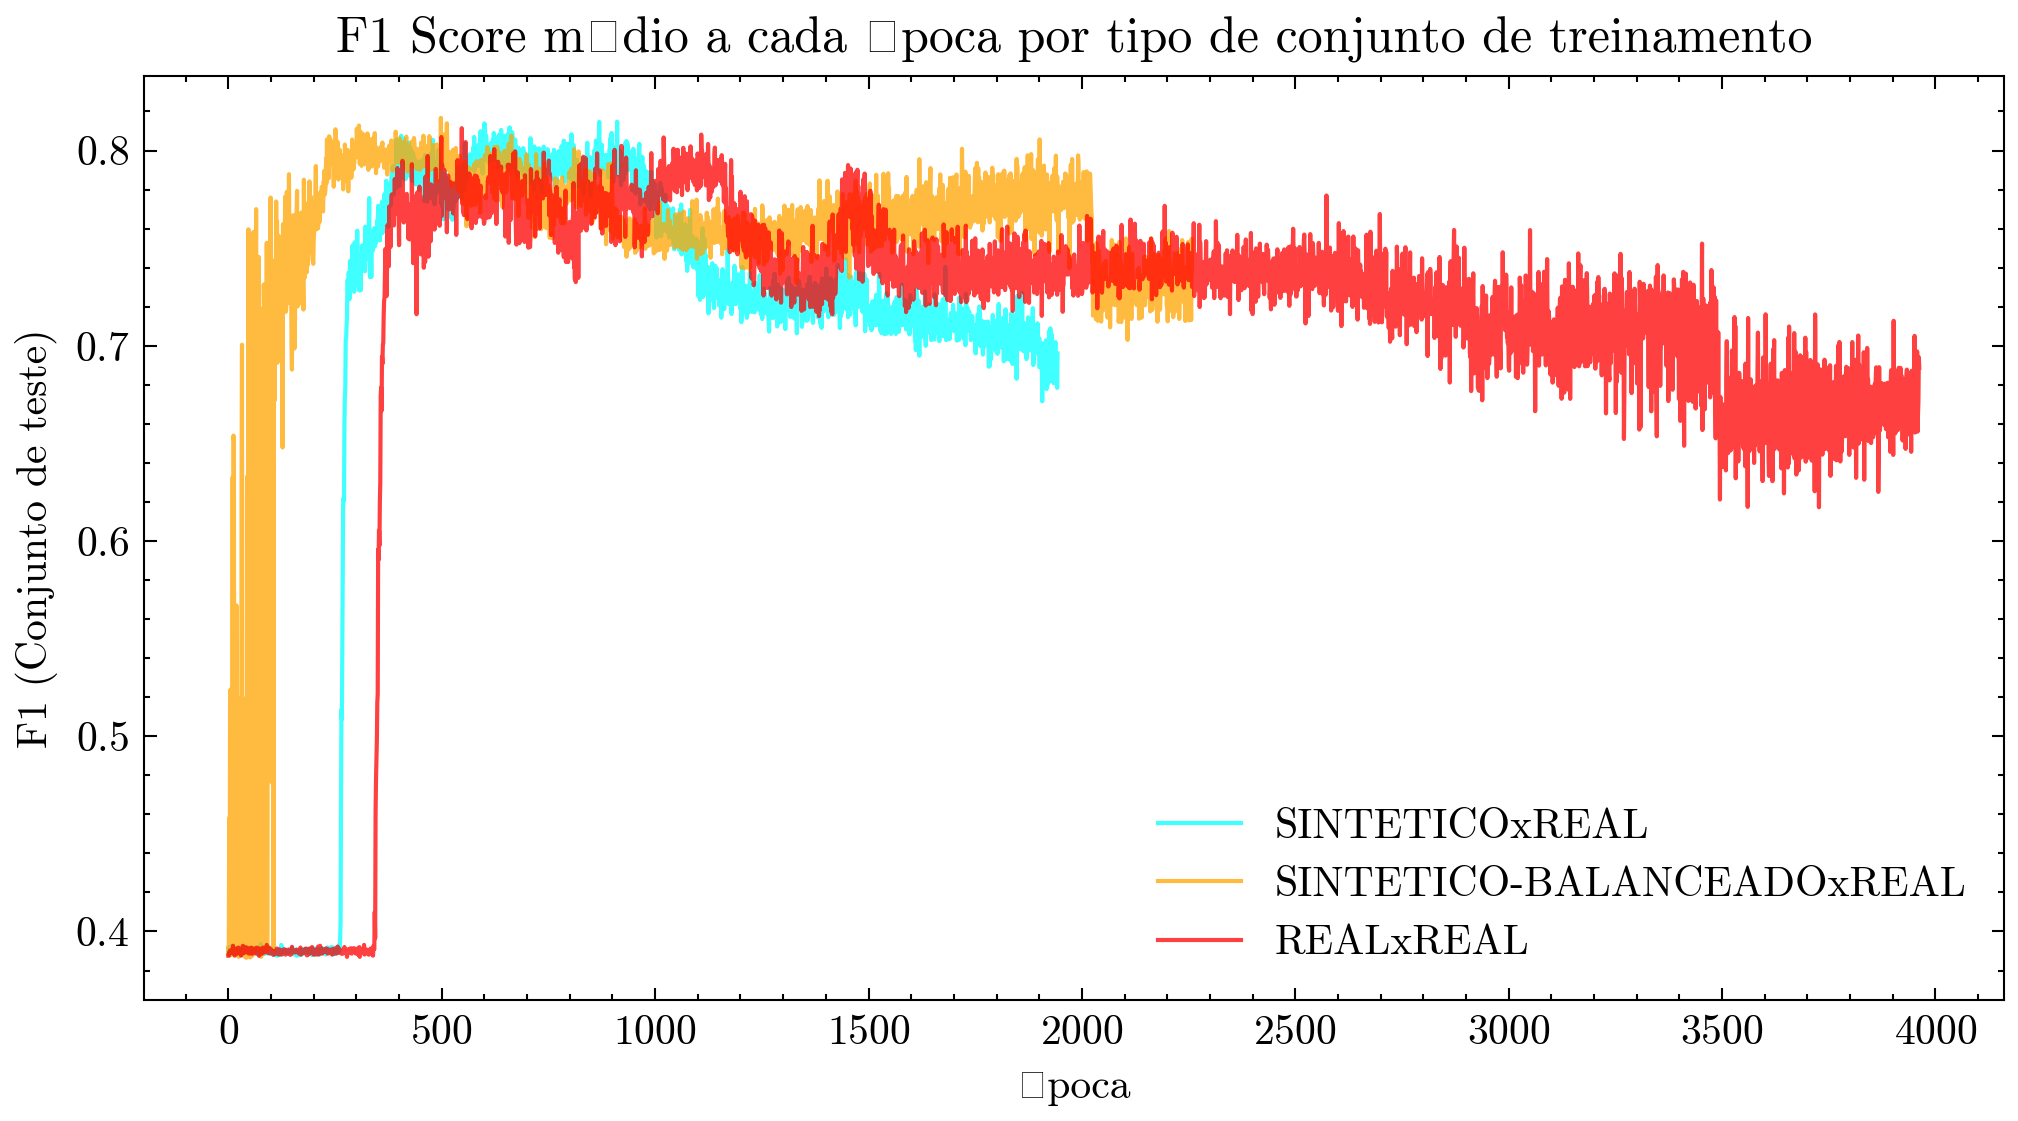

In [81]:
cdf = df.groupby(["experiment_name", "step"]).agg({"f1_macro_test": "max"}).reset_index()
fig, ax = plt.subplots(figsize=(8, 4), dpi=(300))
sns.lineplot(data=cdf[cdf.experiment_name=="XRAY-64x64-SYNTHETIC-UNBALANCED"], x="step", y="f1_macro_test", label="SINTETICOxREAL", color='cyan', alpha=.75)
sns.lineplot(data=cdf[cdf.experiment_name=="XRAY-64x64-SYNTHETIC-BALANCED"], x="step", y="f1_macro_test", label="SINTETICO-BALANCEADOxREAL", color='orange', alpha=.75)
sns.lineplot(data=cdf[cdf.experiment_name=="XRAY-64x64-REAL"], x="step", y="f1_macro_test", label="REALxREAL", color='red', alpha=.75)
ax.set_title("F1 Score médio a cada época por tipo de conjunto de treinamento")
ax.set_xlabel("Época")
ax.set_ylabel("F1 (Conjunto de teste)")
plt.show()

/tmp/ipykernel_1246987/3185917061.py:46: UserWarning: Glyph 231 (\N{LATIN SMALL LETTER C WITH CEDILLA}) missing from current font.
  plt.savefig("epochs.png")
/tmp/ipykernel_1246987/3185917061.py:46: UserWarning: Glyph 245 (\N{LATIN SMALL LETTER O WITH TILDE}) missing from current font.
  plt.savefig("epochs.png")
/tmp/ipykernel_1246987/3185917061.py:46: UserWarning: Glyph 227 (\N{LATIN SMALL LETTER A WITH TILDE}) missing from current font.
  plt.savefig("epochs.png")
/tmp/ipykernel_1246987/3185917061.py:46: UserWarning: Glyph 233 (\N{LATIN SMALL LETTER E WITH ACUTE}) missing from current font.
  plt.savefig("epochs.png")
/tmp/ipykernel_1246987/3185917061.py:46: UserWarning: Glyph 225 (\N{LATIN SMALL LETTER A WITH ACUTE}) missing from current font.
  plt.savefig("epochs.png")
/tmp/ipykernel_1246987/3185917061.py:46: UserWarning: Glyph 201 (\N{LATIN CAPITAL LETTER E WITH ACUTE}) missing from current font.
  plt.savefig("epochs.png")
/home/ale/Documents/diffusion-augmentation/venv/lib/py

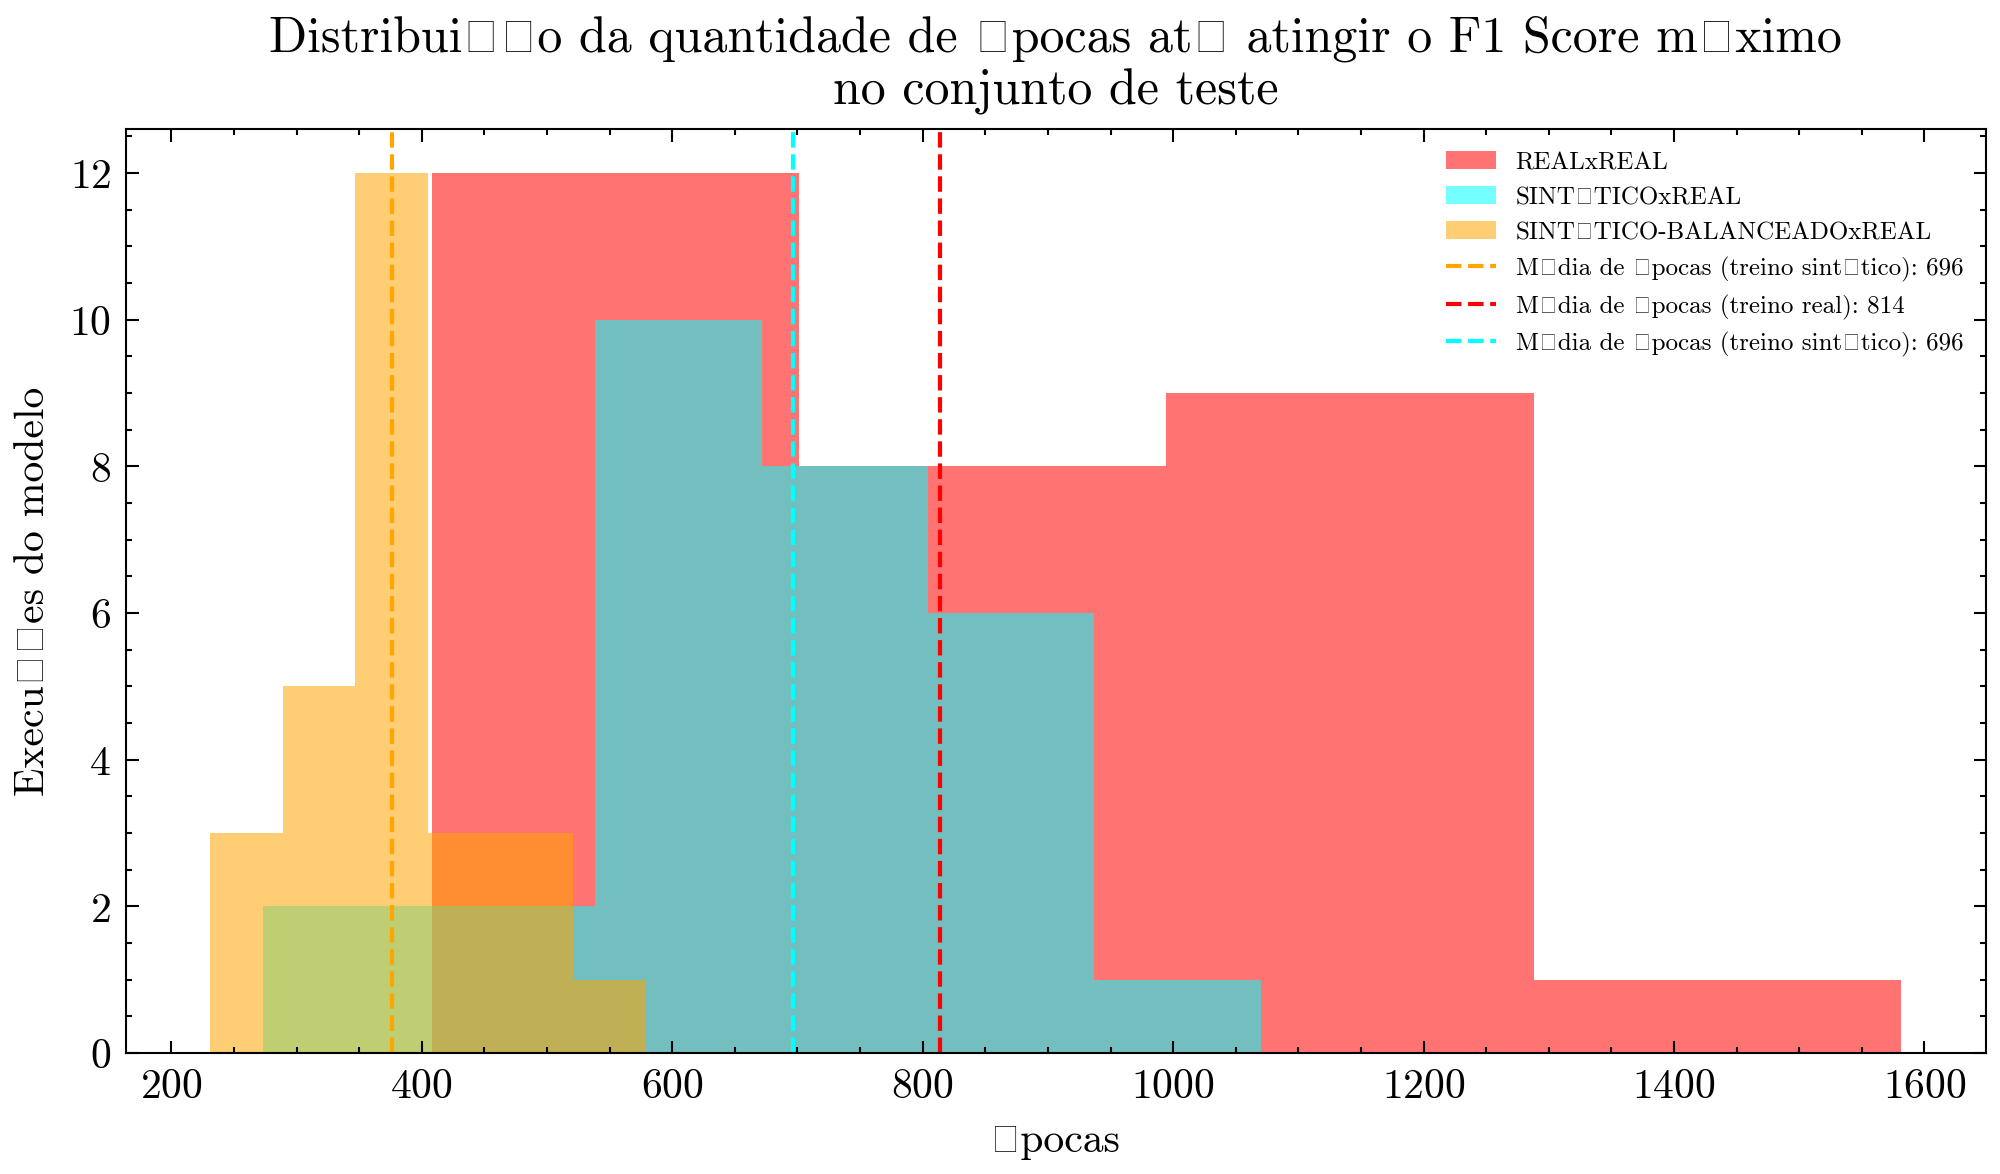

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4), dpi=(300))

runs_reais = sigma_clip(rdf[rdf.experiment_name == "XRAY-64x64-REAL"].converge_at, sigma=3, cenfunc="mean", masked=False)
runs_sinteticas = sigma_clip(rdf[rdf.experiment_name == "XRAY-64x64-SYNTHETIC-UNBALANCED"].converge_at, sigma=3, cenfunc="mean", masked=False)
runs_sinteticas_balanceadas = sigma_clip(rdf[rdf.experiment_name == "XRAY-64x64-SYNTHETIC-BALANCED"].converge_at, sigma=3, cenfunc="mean", masked=False)

hist(
    runs_reais,
    histtype='stepfilled',
    bins="freedman",
    alpha=.55,
    ax=ax,
    color='red',
    label="REALxREAL"
)
hist(
    runs_sinteticas,
    histtype='stepfilled',
    bins="freedman",
    alpha=.55,
    ax=ax,
    color='cyan',
    label="SINTÉTICOxREAL",
)
hist(
    runs_sinteticas_balanceadas,
    histtype='stepfilled',
    bins="freedman",
    alpha=.55,
    ax=ax,
    color='orange',
    label="SINTÉTICO-BALANCEADOxREAL",
)


ax.set_xlabel("Épocas")
ax.set_ylabel("Execuções do modelo")

ax.axvline(runs_sinteticas_balanceadas.mean(), color='orange', linestyle='--', label=f"Média de épocas (treino sintético): {round(runs_sinteticas.mean())}")
ax.axvline(runs_reais.mean(), color='red', linestyle='--', label=f"Média de épocas (treino real): {round(runs_reais.mean())}")
ax.axvline(runs_sinteticas.mean(), color='cyan', linestyle='--', label=f"Média de épocas (treino sintético): {round(runs_sinteticas.mean())}")

ax.set_title("Distribuição da quantidade de épocas até atingir o F1 Score máximo\nno conjunto de teste")

plt.legend(prop={"size": 6})
plt.savefig("epochs.png")